<a href="https://colab.research.google.com/github/ozgur-uylas/OZGURCEMUHENDIS/blob/main/YSA_PROJE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# os modülü, işletim sistemi işlemleri için kullanılır
import os

# pandas kütüphanesini pd takma adıyla içe aktarıyoruz
import pandas as pd


In [ ]:
# Google Drive'ı Colab ortamına bağlamak için gerekli kütüphaneyi ve fonksiyonu içerir.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Bu satır, bulunduğunuz dizindeki dosyaları listeler.
!ls

gdrive	sample_data


In [ ]:
# Bu satır, Kaggle API'nin kullanılabilmesi için konfigürasyonun yapılmasını sağlar.
os.environ['KAGGLE_CONFIG_DIR']="/content/gdrive/MyDrive/Colab Dosyaları "

In [ ]:
%cd "/content/gdrive/MyDrive/Colab Dosyaları "

/content/gdrive/MyDrive/Colab Dosyaları 


In [ ]:
# Bulunduğunuz dizini gösterir.
!pwd

/content


In [ ]:
# Kaggle'dan veri setini indirir.
!kaggle datasets download -d sulianova/cardiovascular-disease-dataset

  0% 0.00/742k [00:00<?, ?B/s]
100% 742k/742k [00:00<00:00, 39.5MB/s]


In [ ]:
# Dosyaların indirildiği dizindeki dosyaları listeler.
!ls

cardiovascular-disease-dataset.zip  gdrive  sample_data


In [ ]:
 # İndirilen zip dosyasını açar ve ardından zip dosyasını siler.
!unzip \*.zip && rm *.zip

Archive:  cardiovascular-disease-dataset.zip
  inflating: cardio_train.csv        


In [ ]:
# İçerisinde bulunduğunuz dizindeki dosyaları listeler.
!ls

cardio_train.csv  gdrive  sample_data


In [ ]:
import numpy as np  # Sayısal işlemler için NumPy kütüphanesini kullanıyoruz
import pandas as pd  # Veri manipülasyonu ve analizi için Pandas kütüphanesini kullanıyoruz
from matplotlib import pyplot as plt  # Veri görselleştirme için Matplotlib kütüphanesini kullanıyoruz
import seaborn as sns  # Veri görselleştirme için Seaborn kütüphanesini kullanıyoruz
from sklearn import preprocessing  # Veri ön işleme için sklearn kütüphanesinden preprocessing modülünü kullanıyoruz
from matplotlib import rcParams  # Matplotlib parametrelerini ayarlamak için kullanılır

# Makine öğrenimi modelleri için gerekli kütüphaneleri ve modülleri yüklüyoruz
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, plot_tree
import sklearn.metrics as metrics  # Sklearn'in metriklerini kullanmak için

# Model performansını değerlendirmek için kullanılan metrikleri yükledik
from sklearn.metrics import f1_score, accuracy_score, classification_report, precision_recall_fscore_support

# LightGBM, hızlı ve dağıtık makine öğrenimi modelleri için kullanılır
from lightgbm import LGBMClassifier, plot_tree
import lightgbm as lgb

import sklearn  # Sklearn kütüphanesini yükler
from sklearn import metrics  # Sklearn'in metriklerini yükler
!pip install joblib  # Joblib kütüphanesini yükler, modelin kaydedilmesi ve yüklenmesi için kullanılabilir
import joblib  # Modelin kaydedilmesi ve yüklenmesi için kullanılır
import time  # Zaman fonksiyonları için kullanılır
from subprocess import check_output  # Komut satırı komutlarını çalıştırmak için kullanılır
import warnings  # Uyarıları kontrol etmek için kullanılır
warnings.filterwarnings("ignore")  # Uyarıları göstermemesi için filtreleme yapar


## `KardiyoVasküler Hastalık Nedir? `

☝


Kardiyovasküler hastalık dediğimiz şey, kalp, damarlar ve kanın vücudumuzda dolaşımını sağlayan yapıların tamamı demektir. Bu sistem, vücuda oksijen ve besin taşıyarak yaşamamız için gerekli olan şeyleri sağlar. Ancak bazı
durumlarda, kalp veya damarlarımızın hastalanmasıyla kardiyovasküler hastalıklar ortaya çıkabilir.

Kardiyovasküler hastalıklar, kalp ve damarların rahatsızlıklarını içeren bir gruptur. Bu hastalıklar, vücudumuzdaki kan dolaşımını etkileyebilir. Özellikle kalp hastalıkları, beyin ve böbrek damarlarını etkileyen hastalıklar ve bacaklardaki damar problemleri bu gruba girer. Bu hastalıkların ortaya çıkması durumunda, vücut görevlerini tam olarak yerine getiremeyebilir ve sağlık sorunları ortaya çıkar

In [ ]:
data_orijinal = pd.read_csv('cardio_train.csv', sep=";")
# 'cardio_train.csv' dosyasını okurken ';' karakteriyle sütunları ayırarak bir DataFrame'e yükler.
# Bu DataFrame'e 'data_orijinal' adını atarız, böylece veri setini daha sonra kullanmak üzere saklarız.
data_orijinal

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
# Veri Sütun Bilgileri


# 0-id(Numara) 0:Hayır 1:Evet
# 1-age(Yaş/Gün)   0:Hayır 1:Evet
# 2-gender(Cinsiyet) 0:Hayır 1:Evet
# 3-height(Boy) 0:Hayır 1:Evet
# 4-weight(Kilo) 0:Hayır 1:Evet
# 5-ap_hi(Sistolik kan basıncı)
# 6-ap_lo(Diyastolik kan basıncı)
# 7-cholesterol(Kolesterol) 1: Normal, 2: Normalin üstünde , 3:Çok yüksek
# 8-gluc(Glikoz) 1: Normal, 2: Normalin üstünde , 3:Çok yüksek
# 9-smoke(Sigara) 0:Hayır 1:Evet
# 10-alco(Alkol) 0:Hayır 1:Evet
# 11-active(Fiziksel Aktivite) 0:Hayır 1:Evet
# 12-cardio(KVH) 0:Hayır 1:Evet


In [ ]:
data_kopya = data_orijinal.copy()
# 'data_orijinal' DataFrame'ini kopyalar ve bu kopyayı 'data_kopya' adında yeni bir DataFrame'e atar.
# Bu, veri seti üzerinde değişiklik yaparken orijinal veri setini korumamıza olanak tanır.
data_kopya

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


***Veri Hakkında Bilgi Edinme***


---




In [ ]:
data_kopya.columns
Data_Frame=pd.DataFrame(data_kopya.columns)
Data_Frame.T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [ ]:
data_kopya.shape #veri seti boyutu hakkında bilgi veriyor  13 sütun 70000 satır

(70000, 13)

In [ ]:
data_kopya.info() # 12 adet- int64  |  1 adet float64
#object değer olmaması işimizi kolaylaştırdı model eğitirken object değerleri tercih etmiyoruz.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
#data_kopya['age_year'] = (data_kopya['age'] / 365).round().astype('int') # Yaşlar gün bazında olduğu için yıl bazında yapmak için kullanılmıştır.
#data_kopya.drop(['id','age'], axis=1, inplace=True) #gereksizleri silme
data_kopya

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,1,165,64.0,130,70,3,1,0,0,0,1,52
3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,1,156,56.0,100,60,1,1,0,0,0,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,168,76.0,120,80,1,1,1,0,1,0,53
69996,1,158,126.0,140,90,2,2,0,0,1,1,62
69997,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,1,163,72.0,135,80,1,2,0,0,0,1,61


In [ ]:
# Veri setinde herhangi bir tekrarlayan değerin olup olmadığını kontrol eder
duplicated_values = data_orijinal.duplicated().any()

# Eğer tekrarlayan değer varsa
if duplicated_values:
    # Toplam tekrarlayan değerlerin sayısını bulur
    count_duplicated = data_orijinal.duplicated().sum()
    # Toplam tekrarlayan değerlerin sayısını ekrana yazdırır
    print(f"Veride {count_duplicated} tekrarlayan değer var.")
# Eğer tekrarlayan değer yoksa
else:
    # Bu durumu ekrana yazdırır
    print("Veride tekrarlayan değer yok.")



Veride tekrarlayan değer yok.


In [ ]:
data_kopya.describe().T  #İstatistiksel açıdan değerlendirme


,count,mean,std,min,25%,50%,75%,max
gender,68535.0,1.348698,0.476562,1.00,1.0,1.0,2.0,2.0
height,68535.0,164.404392,7.966480,104.00,159.0,165.0,170.0,250.0
weight,68535.0,74.136165,14.285302,35.45,65.0,72.0,82.0,200.0
ap_hi,68535.0,126.633297,16.465113,85.00,120.0,120.0,140.0,200.0
ap_lo,68535.0,81.354695,9.493036,50.00,80.0,80.0,90.0,182.0
cholesterol,68535.0,1.364617,0.679028,1.00,1.0,1.0,1.0,3.0
gluc,68535.0,1.225841,0.571862,1.00,1.0,1.0,1.0,3.0
smoke,68535.0,0.087911,0.283168,0.00,0.0,0.0,0.0,1.0
alco,68535.0,0.053506,0.225041,0.00,0.0,0.0,0.0,1.0
active,68535.0,0.803458,0.397386,0.00,1.0,1.0,1.0,1.0


In [ ]:
data_kopya.groupby('cardio')[['cholesterol', 'gluc']].agg(['min', 'max', 'mean']) # Buradan cardio hastalığında  Glikoz ve Kolestrol etkisinin hasta olan ve olmayan kişide etkisini öçlüyoruz.

cholesterol               gluc              
               min max      mean  min max      mean
cardio                                             
0                1   3  1.215894    1   3  1.175177
1                1   3  1.516298    1   3  1.277513

In [ ]:
data_kopya.isnull().sum() #eksik veri var mı yok mu ?

gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_year       0
dtype: int64

In [ ]:
outliers = ((data_kopya["ap_hi"]>200) | (data_kopya["ap_lo"]>185) | (data_kopya["ap_lo"]<50) | (data_kopya["ap_hi"]<=80) | (data_kopya["height"]<=100)
             | (data_kopya["weight"]<=35) )
print("Toplam {} Aykırı Değer".format(data_kopya[outliers]["cardio"].count()))

Toplam 0 Aykırı Değer


In [ ]:
# 'cardio' sütunu bağımlı değişken olarak belirleniyor ve 'y' değişkenine atanıyor.
y = data_kopya.cardio

# 'cardio' sütununu çıkartarak geri kalan tüm sütunlar bağımsız değişkenler olarak 'x' değişkenine atanıyor.
x = data_kopya.drop('cardio', axis=1)


In [ ]:
data_kopya = data_kopya[~outliers] #aykırı değerlerden arındırma adımı

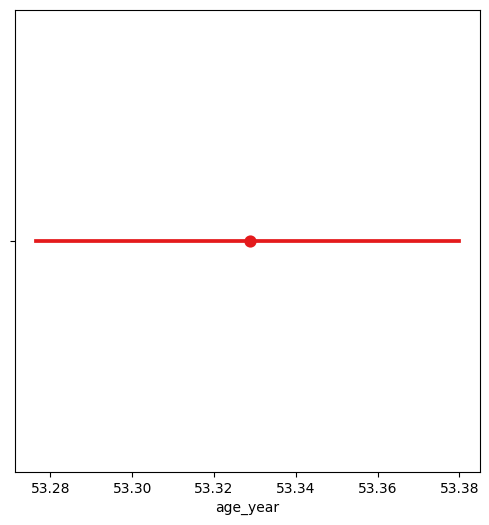

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grafik boyutunu ayarla
plt.rcParams['figure.figsize'] = 6, 6

# Veri çerçevesindeki 'age_year' ve 'cardio' değişkenlerini kullanarak pointplot çiz
sns.pointplot(x='age_year', y=None, hue='cardio', data=data_kopya ,dodge=True, markers='o', linestyles='-', palette='Set1')

# Grafiği göster
plt.show()


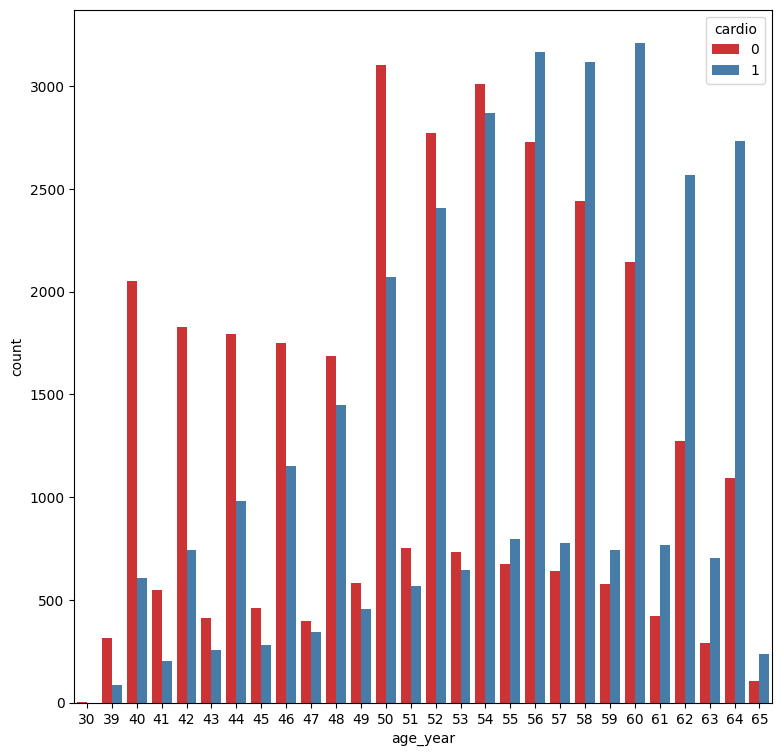

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grafik boyutunu belirleme
genislik, yukseklik = 9, 9  # Genişlik: 9 birim, Yükseklik: 9 birim
plt.rcParams['figure.figsize'] = genislik, yukseklik

# 'age_year' ve 'cardio' değişkenlerini kullanarak countplot oluşturma
sns.countplot(x='age_year', hue='cardio', data=data_kopya, palette="Set1")

# Oluşturulan grafiği gösterme
plt.show()


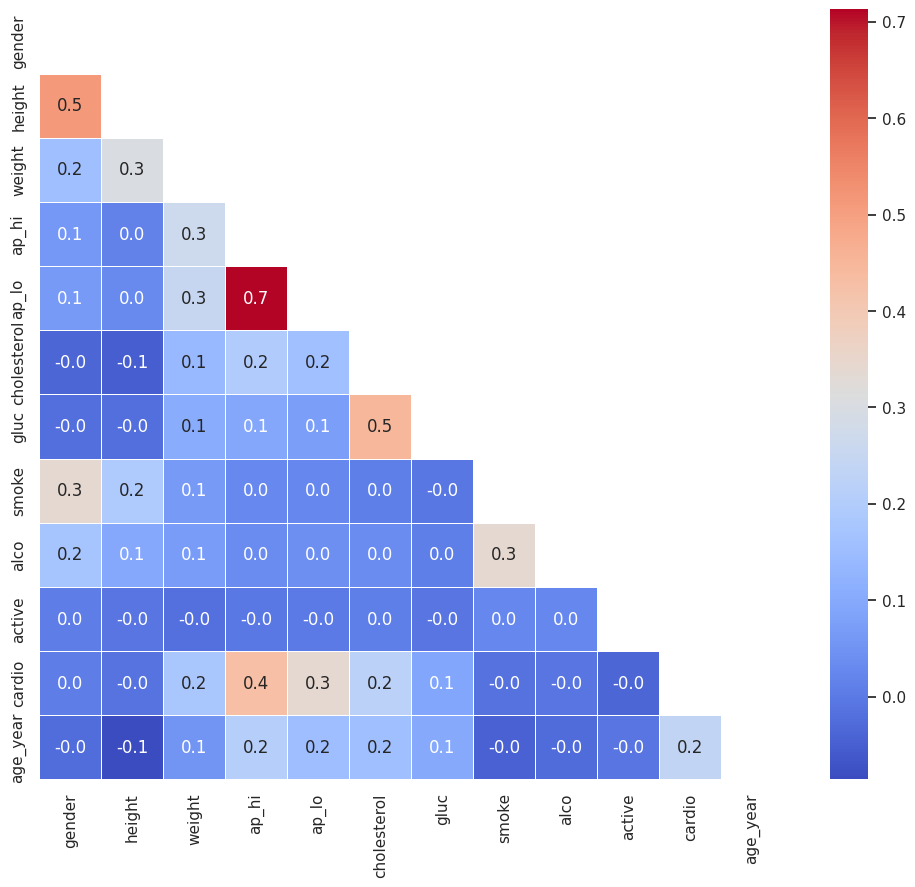

In [ ]:
import seaborn as sns  # Veri görselleştirmek için Seaborn kütüphanesini içe aktarıyoruz
import matplotlib.pyplot as plt  # Veri görselleştirmek için Matplotlib kütüphanesini içe aktarıyoruz
import numpy as np  # Sayısal işlemler için NumPy kütüphanesini içe aktarıyoruz

# Verilen veri çerçevesinin yarı korelasyon ısı haritasını çizen bir fonksiyon tanımlıyoruz
def half_corr_heatmap(dataframe, title=None):
    plt.figure(figsize=(12, 10))  # 12x10 boyutunda bir çizim alanı oluşturuyoruz
    sns.set(font_scale=1)  # Seaborn'un font ölçeğini ayarlıyoruz

    correlation_matrix = dataframe.corr()  # Veri çerçevesinin korelasyon matrisini oluşturuyoruz
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Üst üçgensel bir maske oluşturuyoruz

    # Heatmap'i çiziyoruz, korelasyon matrisini görselleştiriyoruz
    with sns.axes_style("white"):
        sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", linewidths=.5, fmt='.1f')

    if title:
        plt.title(f"\n{title}\n", fontsize=18)  # Başlık ekliyoruz, eğer başlık varsa

    plt.show()  # Oluşturulan ısı haritasını gösteriyoruz

# 'data_kopya' adlı veri çerçevesi için yarı korelasyon ısı haritasını çizmek için fonksiyonu çağırıyoruz
half_corr_heatmap(data_kopya)  # 'data_kopya' adındaki veri çerçevesi için yarı korelasyon ısı haritası çizilir


<Axes: xlabel='variable', ylabel='count'>

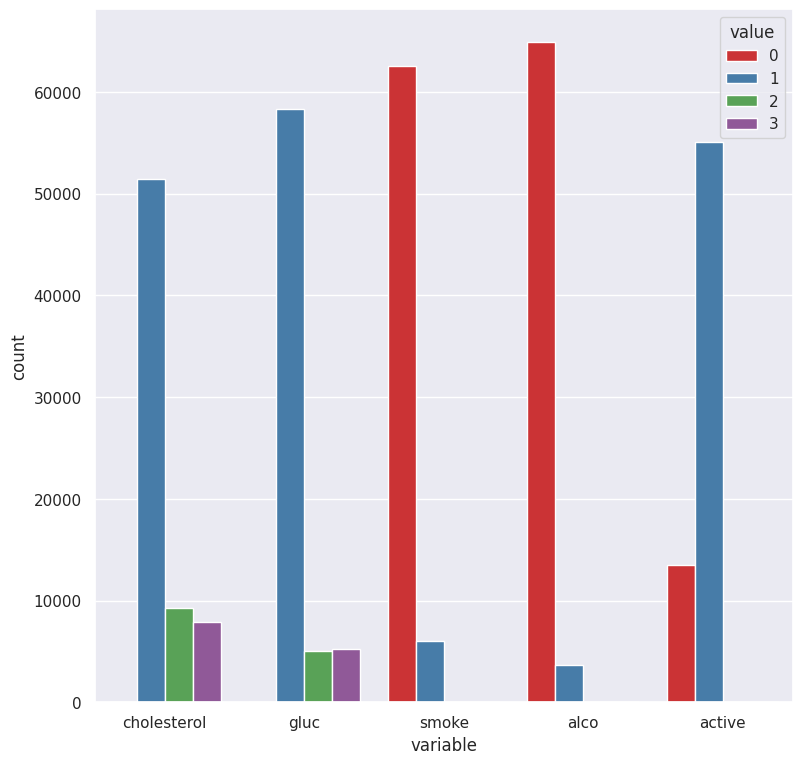

In [ ]:
import seaborn as sns
import pandas as pd

# Belirli sütunları içeren bir alt veri seti oluştur
selected_columns = ['cholesterol', 'gluc', 'smoke', 'alco', 'active']
subset_df = data_kopya.loc[:, selected_columns]

# Veri çerçevesini melt işlemine tabi tutarak sütunları birleştir
melted_df = pd.melt(subset_df)

# Belirtilen sütunları 'variable' olarak, değerleri 'hue' olarak kullanarak countplot çiz
sns.countplot(x="variable", hue="value", data=melted_df, palette="Set1")


<Axes: ylabel='Count'>

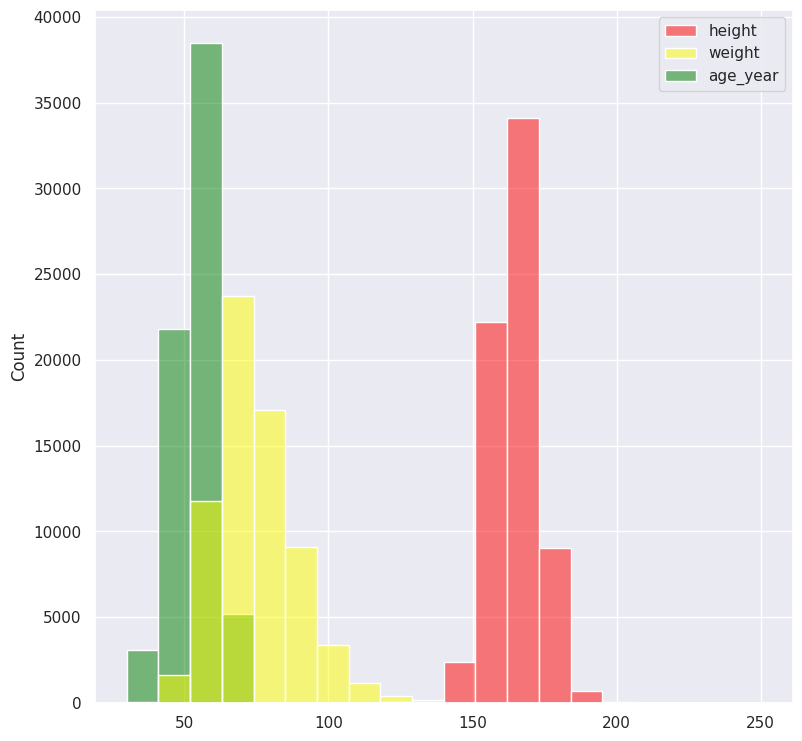

In [ ]:
import seaborn as sns
import pandas as pd

# Veri setinizin başka bir adı varsa onu kullanın veya df olarak tanımlayın
numerik = data_kopya[['height', 'weight', 'age_year']].copy()

# Seaborn ile histogram çizimi, renkleri belirleyerek çizim
sns.histplot(data=numerik, bins=20, kde=False, palette=["red", "yellow", "green"])


<Axes: ylabel='Count'>

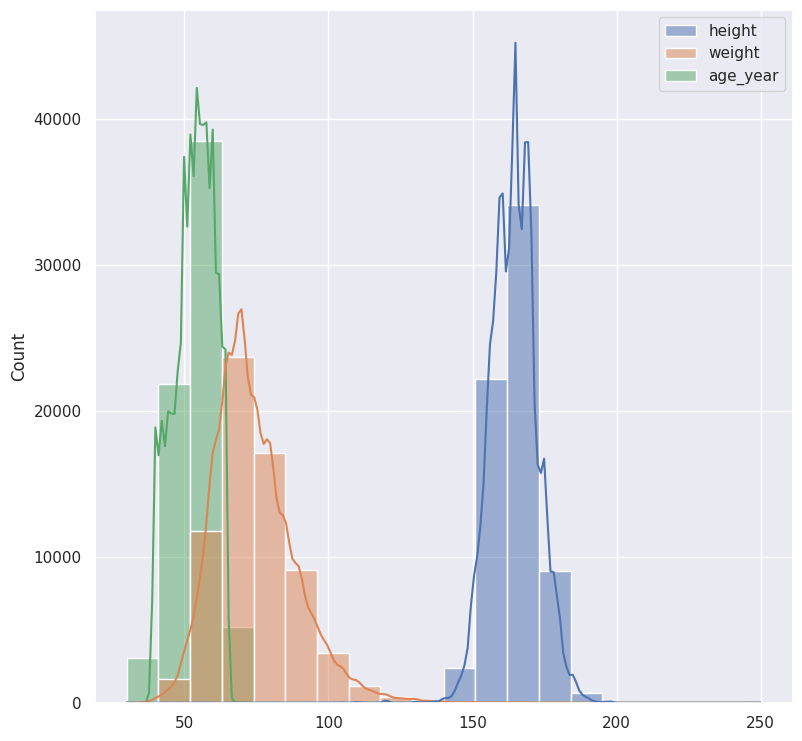

In [ ]:
import seaborn as sns  # Veri görselleştirmek için Seaborn kütüphanesini içe aktarıyoruz
import pandas as pd  # Veri manipülasyonu için Pandas kütüphanesini içe aktarıyoruz

# Eğer veri setinizin farklı bir adı varsa onu kullanabilirsiniz
# Sadece sayısal verileri içeren bir alt küme oluşturuyoruz: 'height', 'weight', 'age_year'
numerik = data_kopya[['height', 'weight', 'age_year']].copy()

# Seaborn kütüphanesiyle histogram çizimi yapıyoruz
# 'bins' parametresiyle histogram çubuklarının sayısını belirliyoruz
# 'kde=True' ile veri dağılımını gösteren yoğunluk eğrisi ekliyoruz
# 'palette="deep"' ile renk paletini belirliyoruz
sns.histplot(data=numerik, bins=20, kde=True, palette="deep")


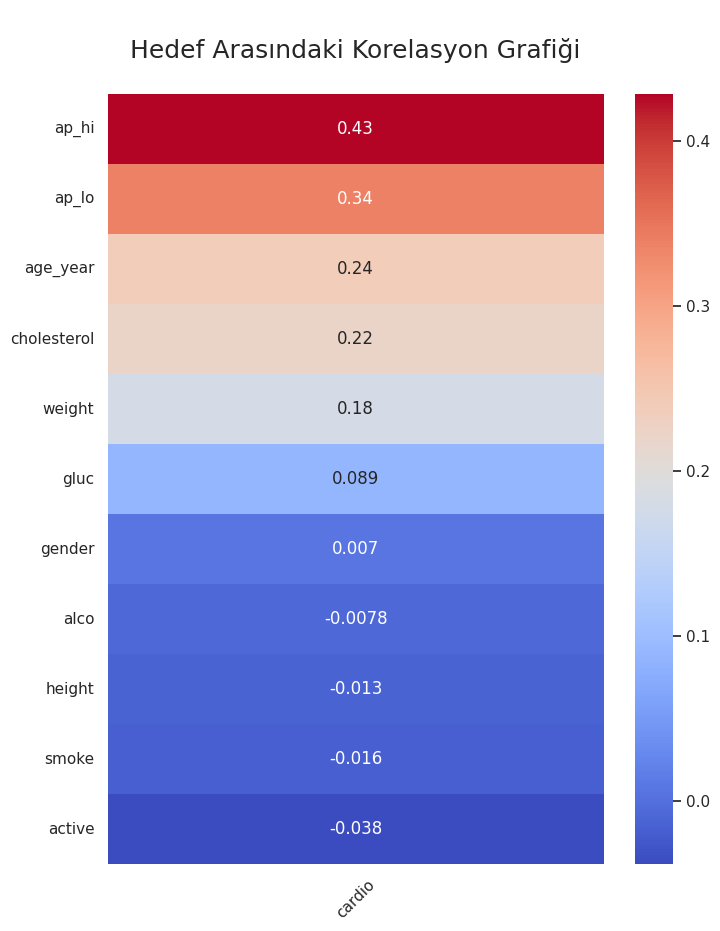

In [ ]:
def corr_for_target(data_kopya, target, title=None):
    plt.figure(figsize=(8, 10))  # Grafik boyutunu ayarla
    sns.set(font_scale=1)

    # Heatmap oluştur
    heatmap = sns.heatmap(data_kopya.corr()[[target]].sort_values(by=target, ascending=False)[1:], annot=True, cmap="coolwarm")

    # Başlık ekle
    if title:
        plt.title(f"\n{title}\n", fontsize=18)

    # x ve y eksen etiketlerini güncelle
    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)  # x ekseni etiketlerini döndür
    heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)   # y ekseni etiketlerini döndür

    plt.show()
    return

corr_for_target(data_kopya, 'cardio', 'Hedef Arasındaki Korelasyon Grafiği')

In [ ]:
data_kopya["vki"] = data_kopya["weight"]/ (data_kopya["height"]/100)**2

<Axes: ylabel='VKI'>

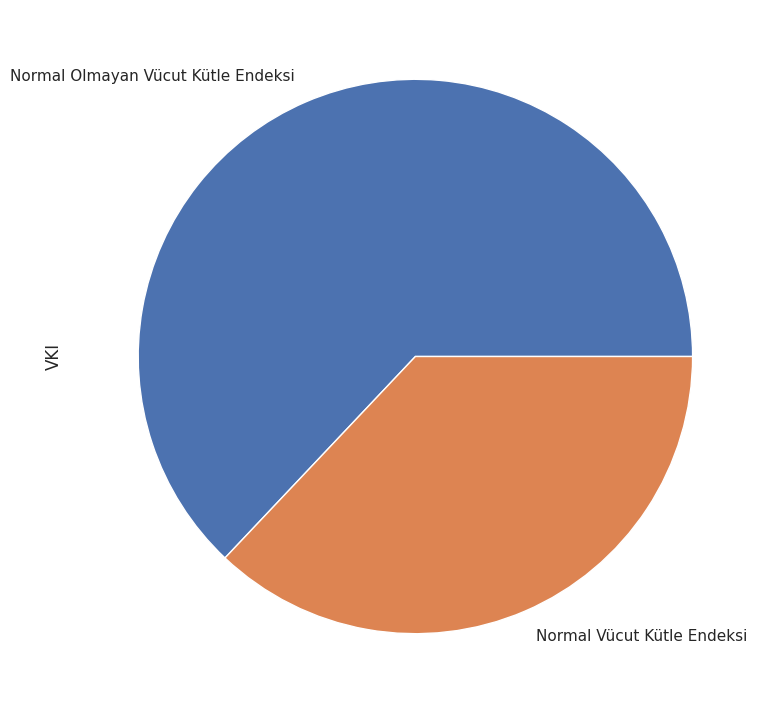

In [ ]:
# Vücut kitle indeksine (VKİ) göre kategorize eden bir fonksiyon tanımlıyoruz
def vki_cat(bmi_score):
    if 18.5 <= bmi_score <= 25:
        return "Normal Vücut Kütle Endeksi"
    else:
        return "Normal Olmayan Vücut Kütle Endeksi"

# 'vki' sütununu, vücut kitle indeksini kategorize eden fonksiyonu kullanarak yeni bir sütuna ekliyoruz
data_kopya["VKI"] = data_kopya["vki"].apply(lambda x: vki_cat(x))

# Oluşturulan kategorik VKİ sütununun değerlerine göre sayım yaparak pasta grafiği çiziyoruz
data_kopya["VKI"].value_counts().plot(kind='pie')


<Axes: ylabel='tansiyon'>

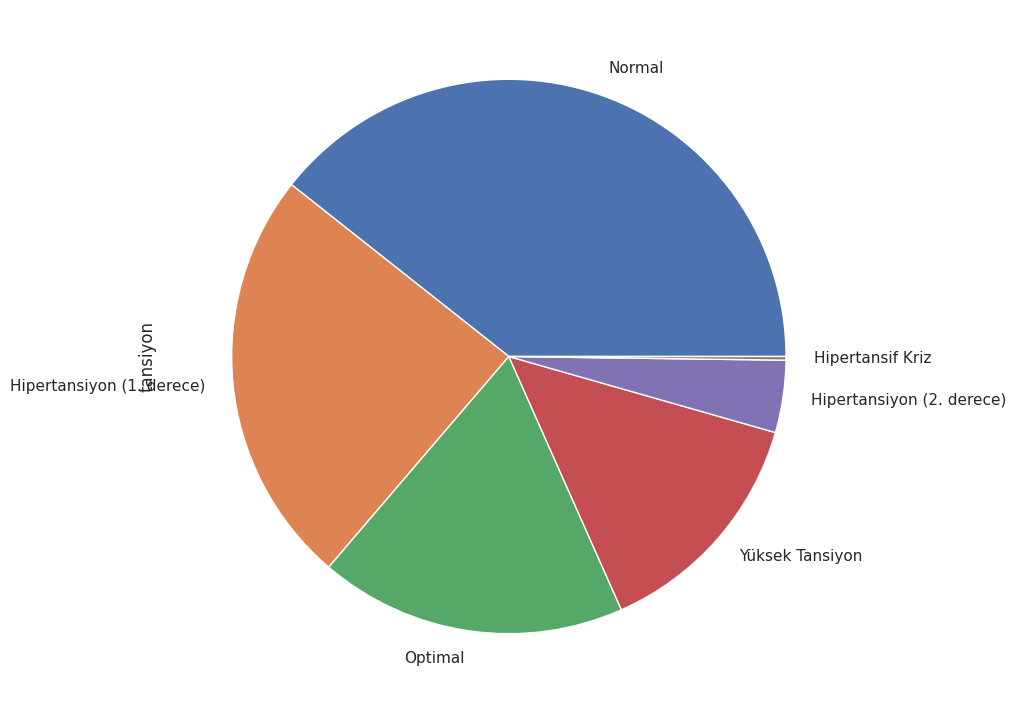

In [ ]:
# Kan basıncını kategorize eden bir fonksiyon tanımlıyoruz
def categorize_tansiyon(x):
    if x['ap_hi'] < 120 and x['ap_lo'] <= 80:
        return "Optimal"
    elif 120 <= x['ap_hi'] <= 129 and x['ap_lo'] <= 80:
        return "Normal"
    elif 130 <= x['ap_hi'] <= 139 or 85 <= x['ap_lo'] <= 89:
        return "Yüksek Tansiyon"
    elif 140 <= x['ap_hi'] <= 159 or 90 <= x['ap_lo'] <= 99:
        return "Hipertansiyon (1. derece)"
    elif 160 <= x['ap_hi'] <= 180 or 100 <= x['ap_lo'] <= 109:
        return "Hipertansiyon (2. derece)"
    elif (x['ap_hi'] > 180 and x['ap_lo'] > 120) or (x['ap_hi'] > 180 or x['ap_lo'] > 120):
        return "Hipertansif Kriz"

# Veri çerçevesine yeni bir 'tansiyon' sütunu ekliyoruz ve kategorize_tansiyon fonksiyonunu uyguluyoruz
data_kopya['tansiyon'] = data_kopya.apply(categorize_tansiyon, axis=1)

# Oluşturulan kategorik 'tansiyon' sütununun değerlerine göre sayım yaparak pasta grafiği çiziyoruz
data_kopya["tansiyon"].value_counts().plot(kind='pie')


In [ ]:
# Verilen yaş değerlerini kategorize eden bir fonksiyon tanımlıyoruz
def categorize_age(age_year):
    if 0 < age_year <= 2:
        return "Bebek"
    elif 2 < age_year <= 12:
        return "Çocuk"
    elif 12 < age_year <= 19:
        return "Ergen"
    elif 19 < age_year <= 24:
        return "Genç"
    elif 24 < age_year <= 44:
        return "Yetişkin"
    elif 44 < age_year <= 65:
        return "Orta Yaşlı"
    elif 65 < age_year:
        return "Yaşlı"

# 'age_year' sütununu kullanarak veri çerçevesine yeni bir 'age_cat' (yaş kategorisi) sütunu ekliyoruz
data_kopya['age_cat'] = data_kopya['age_year'].apply(lambda x: categorize_age(x))


In [ ]:
data_kopya

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,vki,VKI,tansiyon,age_cat
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Normal Vücut Kütle Endeksi,Optimal,Orta Yaşlı
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Normal Olmayan Vücut Kütle Endeksi,Hipertansiyon (1. derece),Orta Yaşlı
2,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805,Normal Vücut Kütle Endeksi,Yüksek Tansiyon,Orta Yaşlı
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Normal Olmayan Vücut Kütle Endeksi,Hipertansiyon (1. derece),Orta Yaşlı
4,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177,Normal Vücut Kütle Endeksi,Optimal,Orta Yaşlı
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,168,76.0,120,80,1,1,1,0,1,0,53,26.927438,Normal Olmayan Vücut Kütle Endeksi,Normal,Orta Yaşlı
69996,1,158,126.0,140,90,2,2,0,0,1,1,62,50.472681,Normal Olmayan Vücut Kütle Endeksi,Hipertansiyon (1. derece),Orta Yaşlı
69997,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Normal Olmayan Vücut Kütle Endeksi,Hipertansiyon (1. derece),Orta Yaşlı
69998,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Normal Olmayan Vücut Kütle Endeksi,Yüksek Tansiyon,Orta Yaşlı


In [ ]:
from sklearn.model_selection import train_test_split

# Veri setini eğitim ve test alt kümelerine bölen bir işlem yapılıyor
# 'x' verileri ve 'y' hedef değişkeni arasında ayrım yapılıyor
# test_size=0.30 parametresiyle verinin %70'ini eğitim setine ve %30'unu test setine ayırıyoruz
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import numpy as np

# Çeşitli sınıflandırıcıları içeren bir liste oluşturuluyor
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machines', SVC()),
    ('K-nearest Neighbors', KNeighborsClassifier()),
    ('XGBoost', XGBClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('LightGBM', LGBMClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('ExtraTree', ExtraTreesClassifier())
]

# Boş bir DataFrame oluşturuluyor
results = pd.DataFrame(columns=['Method', 'Accuracy in %', 'F1-score'])

# Her bir sınıflandırıcı için eğitim ve değerlendirme adımları yapılıyor
for method, func in classifiers:
    # Sınıflandırıcı eğitim verileriyle uyumlandırılıyor
    func.fit(X_train, y_train)

    # Test verileri üzerinde tahmin yapılıyor
    pred = func.predict(X_test)

    # Performans ölçümleri hesaplanıp sonuçlar DataFrame'e kaydediliyor
    accuracy = 100 * np.round(accuracy_score(y_test, pred), decimals=4)
    f1 = round(f1_score(y_test, pred), 2)

    results = results.append({'Method': method, 'Accuracy in %': accuracy, 'F1-score': f1}, ignore_index=True)

# Elde edilen sonuçlar DataFrame olarak gösteriliyor veya başka amaçlar için kullanılabilir
print(results)




[LightGBM] [Info] Number of positive: 24429, number of negative: 24571
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 49000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498551 -> initscore=-0.005796
[LightGBM] [Info] Start training from score -0.005796
                    Method  Accuracy in %  F1-score
0      Logistic Regression          68.94      0.68
1            Decision Tree          62.95      0.63
2            Random Forest          72.03      0.71
3  Support Vector Machines          59.32      0.62
4      K-nearest Neighbors          55.49      0.55
5                  XGBoost          72.63      0.72
6        Gradient Boosting          73.35      0.72
7                 LightGBM 

In [ ]:
results

,Method,Accuracy in %,F1-score
0,Logistic Regression,68.94,0.68
1,Decision Tree,62.95,0.63
2,Random Forest,72.03,0.71
3,Support Vector Machines,59.32,0.62
4,K-nearest Neighbors,55.49,0.55
5,XGBoost,72.63,0.72
6,Gradient Boosting,73.35,0.72
7,LightGBM,73.40,0.72
8,AdaBoost,72.65,0.71
9,ExtraTree,71.53,0.71


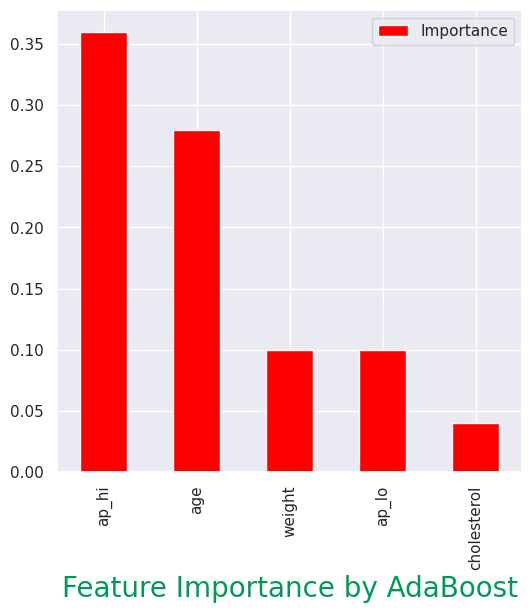

In [ ]:
feature_importance = pd.DataFrame({'Importance' : AdaBoostClassifier().fit(x, y).feature_importances_}, index = x.columns)

feature_importance.sort_values(by = 'Importance', ascending = False, axis = 0)[:5].plot(kind = 'bar', color = 'red', figsize = (6, 6))
plt.xlabel("Feature Importance by AdaBoost", color = "#019955", fontdict= {"fontsize" : 20});


In [ ]:
model_ada = AdaBoostClassifier()
model_ada.fit(X_train, y_train)

y_pred_ada = model_ada.predict(X_test)
y_pred_ada_train = model_ada.predict(X_train)
ada_test_as = metrics.accuracy_score(y_pred_ada, y_test)
ada_train_as = metrics.accuracy_score(y_pred_ada_train, y_train)

print(f"Ada test verisi doğruluk(accuracy) skoru {ada_test_as}")
print(f"Ada train verisi doğruluk(accuracy) skoru {ada_train_as}")
print(classification_report(y_test,y_pred_ada))

Ada test verisi doğruluk(accuracy) skoru 0.7264761904761905
Ada train verisi doğruluk(accuracy) skoru 0.7327551020408163
              precision    recall  f1-score   support

           0       0.69      0.80      0.74     10450
           1       0.77      0.65      0.71     10550

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.72     21000



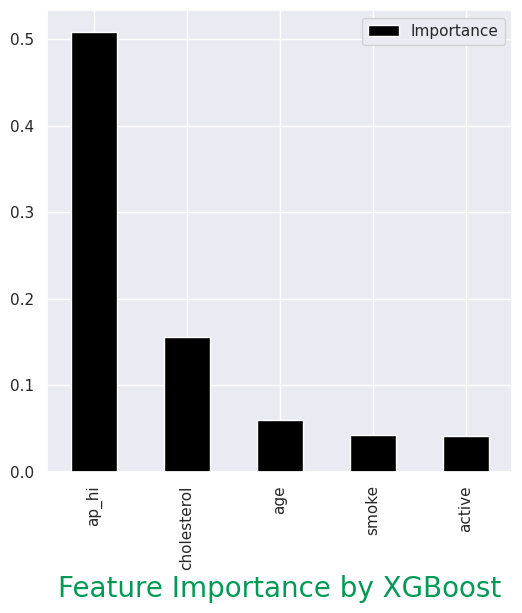

In [ ]:
feature_importance = pd.DataFrame({'Importance' : XGBClassifier().fit(x, y).feature_importances_}, index = x.columns)

feature_importance.sort_values(by = 'Importance', ascending = False, axis = 0)[:5].plot(kind = 'bar', color = '#000000', figsize = (6, 6))
plt.xlabel("Feature Importance by XGBoost", color = "#019955", fontdict= {"fontsize" : 20});

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)
y_pred_xgb_train = model_xgb.predict(X_train)
xgb_test_as = metrics.accuracy_score(y_pred_xgb, y_test)
xgb_train_as = metrics.accuracy_score(y_pred_xgb_train, y_train)

print(f"XGB test verisi doğruluk(accuracy) skoru  {xgb_test_as}")
print(f"XGB train verisi doğruluk(accuracy) skoru  {xgb_train_as}")
print(classification_report(y_test,y_pred_xgb))

XGB test verisi doğruluk(accuracy) skoru  0.7263333333333334
XGB train verisi doğruluk(accuracy) skoru  0.7773265306122449
              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10450
           1       0.75      0.69      0.72     10550

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



[LightGBM] [Info] Number of positive: 34979, number of negative: 35021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 982
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499700 -> initscore=-0.001200
[LightGBM] [Info] Start training from score -0.001200


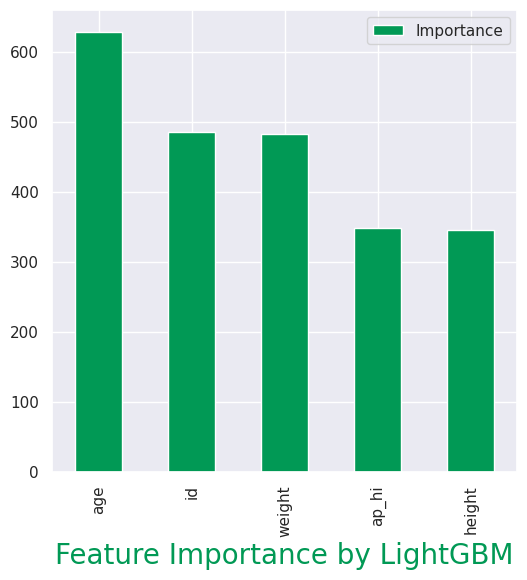

In [ ]:
feature_importance = pd.DataFrame({'Importance' : LGBMClassifier().fit(x, y).feature_importances_}, index = x.columns)

feature_importance.sort_values(by = 'Importance', ascending = False, axis = 0)[:5].plot(kind = 'bar', color = '#019955', figsize = (6, 6))
plt.xlabel("Feature Importance by LightGBM", color = "#019955", fontdict= {"fontsize" : 20});

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_lgbm = LGBMClassifier(subsample= 1.0, num_leaves=100, n_estimators=500, min_child_samples=46, max_depth=15, learning_rate=0.01)
model_lgbm.fit(X_train, y_train)

y_pred_lgbm = model_lgbm.predict(X_test)
y_pred_lgbm_train = model_lgbm.predict(X_train)
lgbm_test_as = metrics.accuracy_score(y_pred_lgbm, y_test)
lgbm_train_as = metrics.accuracy_score(y_pred_lgbm_train, y_train)

y_pred_test = model_lgbm.predict(X_test)
y_pred_train = model_lgbm.predict(X_train)

acc_test = accuracy_score(y_test, y_pred_test)
acc_train = accuracy_score(y_train, y_pred_train)

print(f"LGBM test verisi doğruluk(accuracy) skoru {lgbm_test_as}")
print(f"LGBM train verisi doğruluk(accuracy) skoru {lgbm_train_as}")
print(classification_report(y_test,y_pred_lgbm))

[LightGBM] [Info] Number of positive: 24429, number of negative: 24571
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 49000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498551 -> initscore=-0.005796
[LightGBM] [Info] Start training from score -0.005796
LGBM test verisi doğruluk(accuracy) skoru 0.7328571428571429
LGBM train verisi doğruluk(accuracy) skoru 0.7641020408163265
              precision    recall  f1-score   support

           0       0.71      0.78      0.74     10450
           1       0.76      0.69      0.72     10550

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     

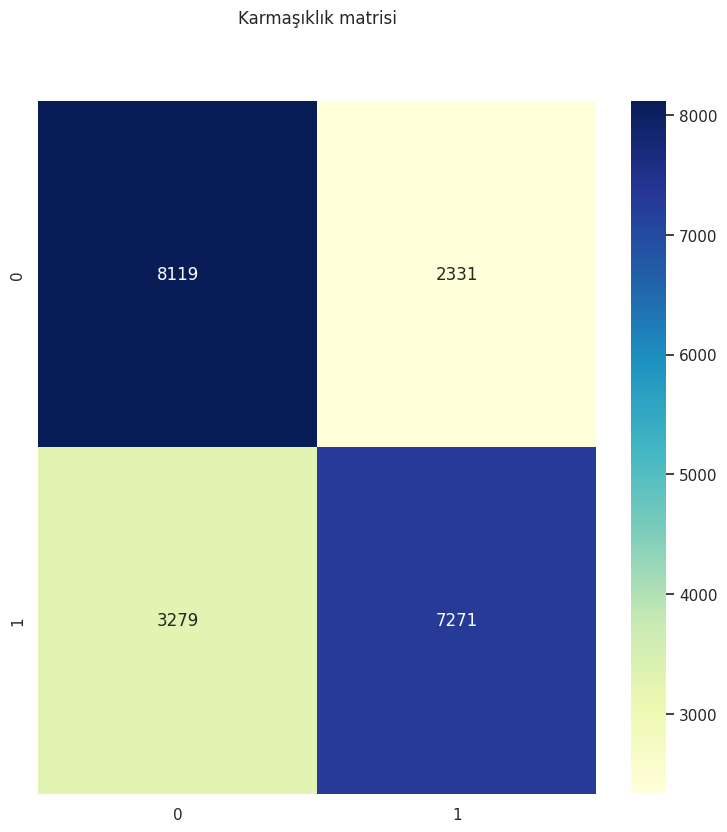

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_lgbm)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Karmaşıklık matrisi', y=1.1);

In [ ]:
y_proba = model_lgbm.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba)

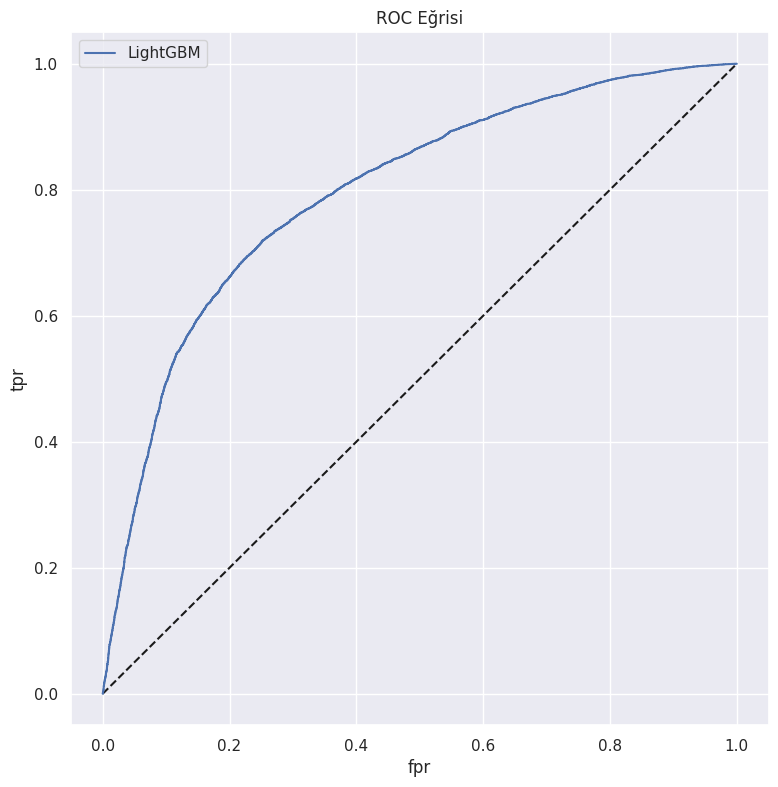

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'LightGBM')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Eğrisi')
plt.legend();

In [ ]:
print('AUC Skoru',metrics.roc_auc_score(y_test, y_proba))

AUC Skoru 0.7965870291843352


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
def lgbm_best_params(X_train, X_test, y_train, y_test):
    lgbm_params = {"n_estimators" : [100,200,500,1000,2000],
               "subsample" : [0.6,0.8,1.0],
               "max_depth" : [5,10,15,20,25,30,35],
               "learning_rate" : [0.1, 0.01, 0.02,0.09],
               "min_child_samples" : np.arange(2,50),
               'num_leaves': [100,200,500],
               }
    lgbm = LGBMClassifier()
    random = RandomizedSearchCV(lgbm, lgbm_params, cv=10, random_state=1, n_jobs=-1, verbose=2)
    random.fit(X_train, y_train)

    print("En iyi training skoru: {} Bu parametreler ile: {}".format(random.best_score_,random.best_params_))

    lgbm = LGBMClassifier(**random.best_params_)
    lgbm.fit(X_train, y_train)
    y_pred_test = lgbm.predict(X_test)
    y_pred_train = lgbm.predict(X_train)

    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    print("Test Skoru: {}, Train Skoru: {}".format(acc_test,acc_train))
    print("Precision Skoru", precision_score(y_test, y_pred_test))
    print("Recall Skoru",recall_score(y_test, y_pred_test))
    return

random_lgbm = lgbm_best_params(X_train_scaled, X_test_scaled, y_train, y_test)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Info] Number of positive: 24429, number of negative: 24571
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 49000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498551 -> initscore=-0.005796
[LightGBM] [Info] Start training from score -0.005796
En iyi training skoru: 0.7353265306122448 Bu parametreler ile: {'subsample': 1.0, 'num_leaves': 100, 'n_estimators': 500, 'min_child_samples': 46, 'max_depth': 15, 'learning_rate': 0.01}
[LightGBM] [Info] Number of positive: 24429, number of negative: 24571
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006110 seconds.
You can set `force

In [ ]:
#Fitting 10 folds for each of 10 candidates, totalling 100 fits
#[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
#[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.8min
#[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.4min finished
#En iyi training skoru: 0.733625 Bu parametreler ile: {'subsample': 1.0, 'num_leaves': 100, 'n_estimators': 500, 'min_child_samples': 46, 'max_depth': 15, 'learning_rate': 0.01}
#Test Skoru: 0.7390714285714286, Train Skoru: 0.7530535714285714
#Precision Skoru 0.7613316661456705
#Recall Skoru 0.6961554952122339

In [ ]:
#Fitting 10 folds for each of 10 candidates, totalling 100 fits
#[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
#[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.8min
#[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.4min finished
#En iyi training skoru: 0.734375 Bu parametreler ile: {'subsample': 1.0, 'num_leaves': 100, 'n_estimators': 500, 'min_child_samples': 46, 'max_depth': 15, 'learning_rate': 0.01}
#Test Skoru: 0.7395, Train Skoru: 0.7529464285714286
#Precision Skoru 0.7541564039408867
#Recall Skoru 0.7049935242480933

In [ ]:
import joblib

joblib.dump(model_lgbm, 'final.pkl')


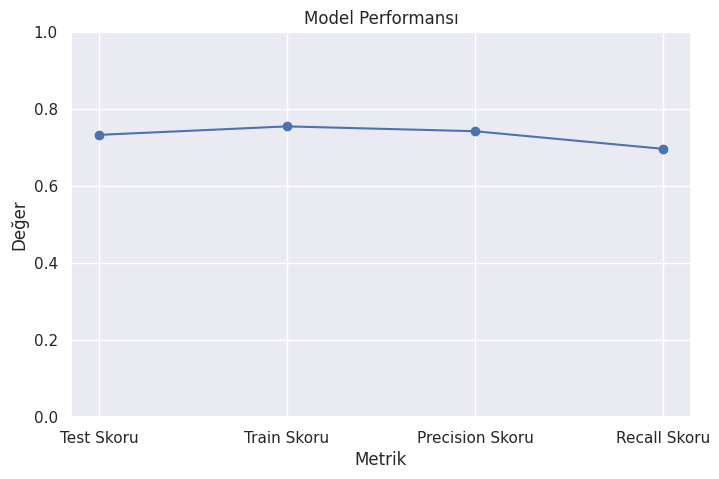

In [ ]:
import matplotlib.pyplot as plt

# Verilen metrik değerleri ve isimleri
scores = [0.7334759982491124, 0.7554925584691708, 0.7429387496033005, 0.6972103643403157]
score_names = ['Test Skoru', 'Train Skoru', 'Precision Skoru', 'Recall Skoru']

# Çizgi grafiği oluşturma
plt.figure(figsize=(8, 5))
plt.plot(score_names, scores, marker='o', linestyle='-')
plt.title('Model Performansı')
plt.xlabel('Metrik')
plt.ylabel('Değer')
plt.ylim(0, 1)  # Y eksenini 0 ile 1 arasında sınırla
plt.grid(True)
plt.show()


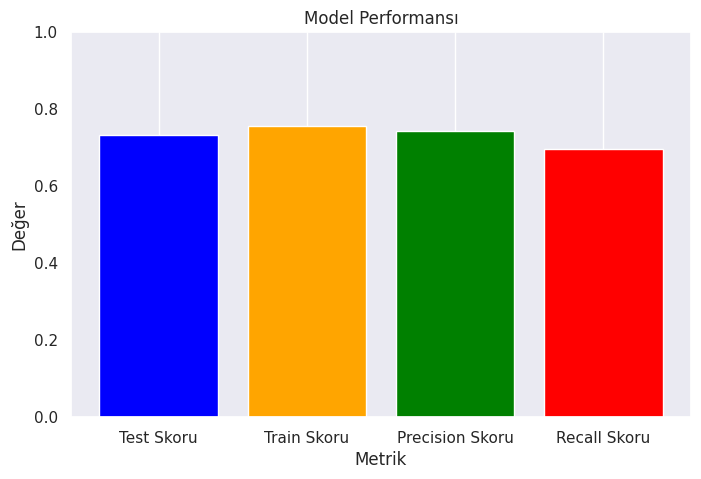

In [ ]:

import matplotlib.pyplot as plt

# Verilen metrik değerleri ve isimleri
scores = [0.7334759982491124, 0.7554925584691708, 0.7429387496033005, 0.6972103643403157]
score_names = ['Test Skoru', 'Train Skoru', 'Precision Skoru', 'Recall Skoru']

# Çubuk grafik oluşturma
plt.figure(figsize=(8, 5))
plt.bar(score_names, scores, color=['blue', 'orange', 'green', 'red'])
plt.title('Model Performansı')
plt.xlabel('Metrik')
plt.ylabel('Değer')
plt.ylim(0, 1)  # Y eksenini 0 ile 1 arasında sınırla
plt.grid(axis='y')  # Sadece y ekseni için ızgara
plt.show()


In [ ]:
import pandas as pd

# Verileri bir sözlük olarak oluşturma
data = {
    'Metrik': ['Test Skoru', 'Train Skoru', 'Precision Skoru', 'Recall Skoru'],
    'Değer': [0.7334759982491124, 0.7554925584691708, 0.7429387496033005, 0.6972103643403157]
}

# Verileri DataFrame'e dönüştürme
df = pd.DataFrame(data)

# Tablo haline getirme
df


,Metrik,Değer
0,Test Skoru,0.733476
1,Train Skoru,0.755493
2,Precision Skoru,0.742939
3,Recall Skoru,0.697210
